# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset



palette = ['#00777F', '#5BABF5', '#AADEFE', '#EAAC9F', '#8AA0AF']
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
data = pd.read_csv('creditcard.csv')
data['Class'] = data['Class'].astype(int)

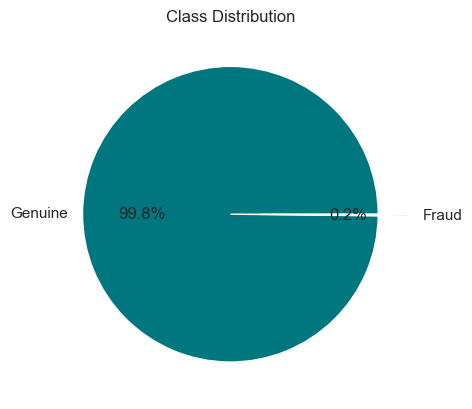

In [6]:
vc = data['Class'].value_counts()
plt.pie(vc.values, labels=['Genuine', 'Fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

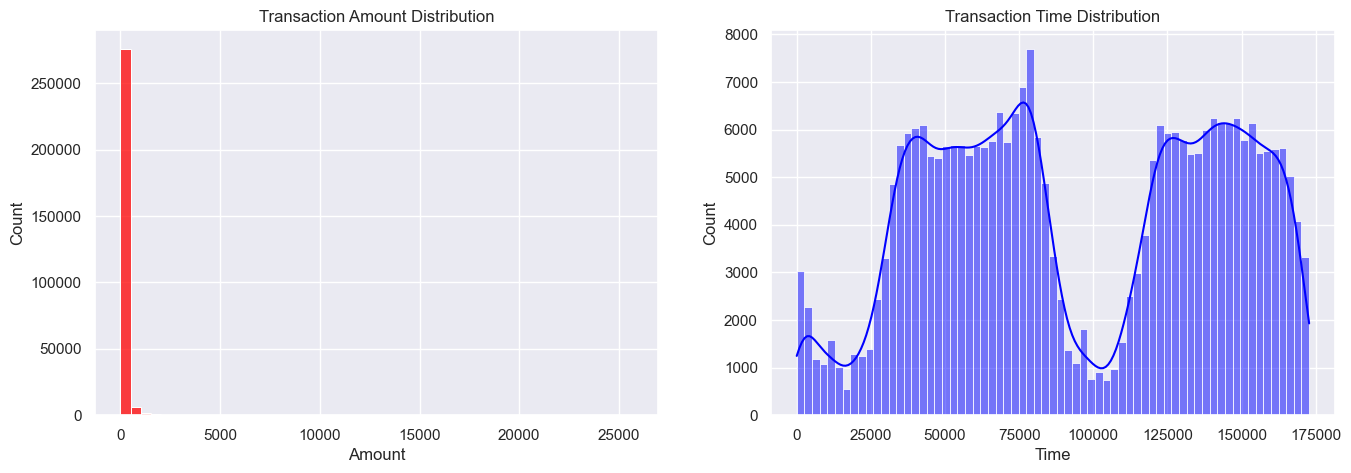

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data['Amount'], ax=ax[0], color='r', bins=50)
ax[0].set_title('Transaction Amount Distribution')

sns.histplot(data['Time'], ax=ax[1], color='b', kde=True)
ax[1].set_title('Transaction Time Distribution')
plt.show()

In [8]:
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def report(y_true, preds, model_name):
    print(f"Classification Report for {model_name}")
    print(classification_report(y_true, preds))
    conf_matrix = confusion_matrix(y_true, preds)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # PCA для візуалізації
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_test)
    colors = ['green' if label == 0 else 'red' for label in preds]
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, alpha=0.6)
    plt.title(f"{model_name} Predictions")
    plt.show()


## Isolation Forest

Classification Report for Isolation Forest
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85307
           1       0.03      0.85      0.05       136

    accuracy                           0.95     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.95      0.97     85443



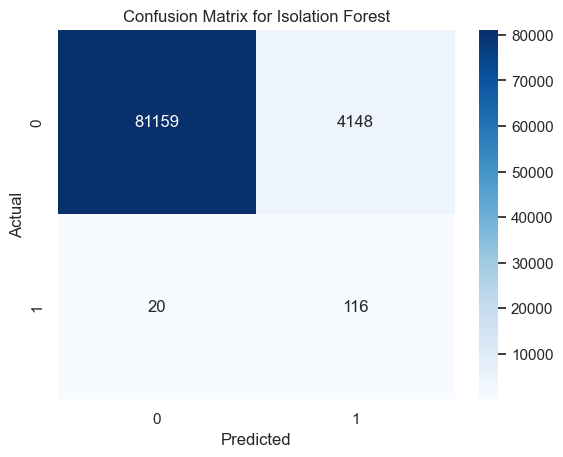

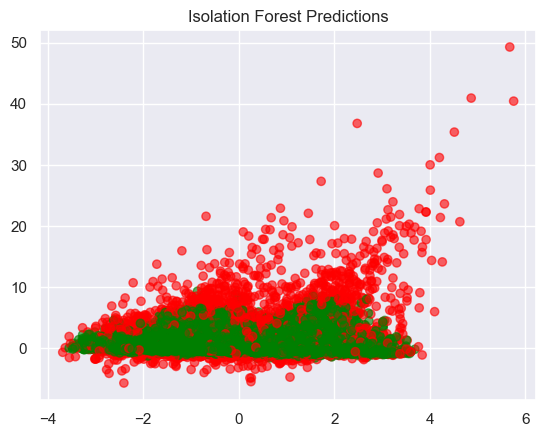

In [11]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(X_train)
iso_preds = [1 if x == -1 else 0 for x in isolation_forest.predict(X_test)]
report(y_test, iso_preds, "Isolation Forest")


## One Class SVM

Classification Report for One-Class SVM
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85307
           1       0.03      0.90      0.06       136

    accuracy                           0.95     85443
   macro avg       0.51      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



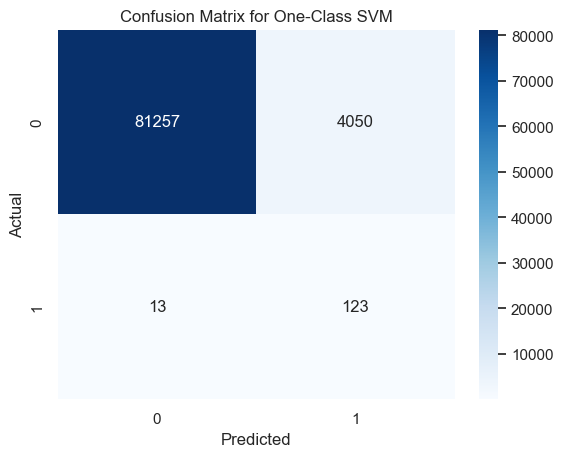

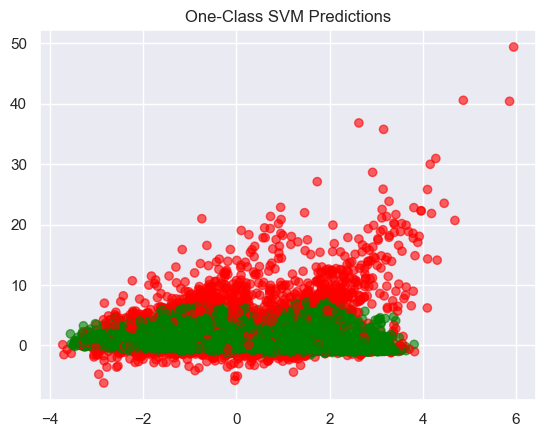

In [12]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
svm.fit(X_train)
svm_preds = [1 if x == -1 else 0 for x in svm.predict(X_test)]
report(y_test, svm_preds, "One-Class SVM")

## Local Outlier Factor

/Users/bodiarudiak/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Classification Report for Local Outlier Factor
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85307
           1       0.00      0.15      0.01       136

    accuracy                           0.95     85443
   macro avg       0.50      0.55      0.49     85443
weighted avg       1.00      0.95      0.97     85443



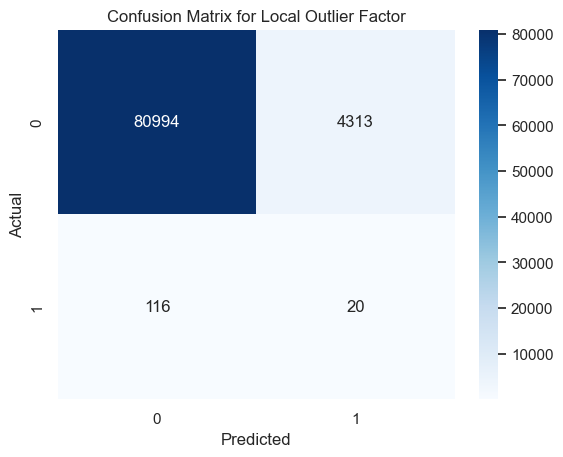

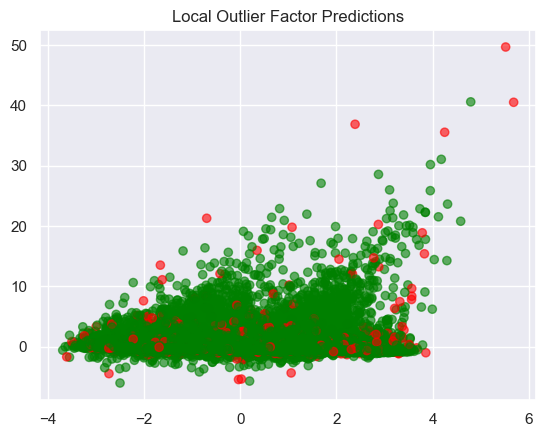

In [13]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)
lof.fit(X_train)
lof_preds = [1 if x == -1 else 0 for x in lof.predict(X_test)]
report(y_test, lof_preds, "Local Outlier Factor")



## Autoencoder

In [14]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(),
            nn.Linear(64, 32), nn.ReLU(),
            nn.Linear(32, 16), nn.ReLU(),
            nn.Linear(16, 7), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 16), nn.ReLU(),
            nn.Linear(16, 32), nn.ReLU(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, input_dim), nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))


Epoch 1, Loss: 0.9371
Epoch 2, Loss: 0.8810
Epoch 3, Loss: 0.8617
Epoch 4, Loss: 0.8456
Epoch 5, Loss: 0.8379
Epoch 6, Loss: 0.8318
Epoch 7, Loss: 0.8249
Epoch 8, Loss: 0.8207
Epoch 9, Loss: 0.8179
Epoch 10, Loss: 0.8129
Epoch 11, Loss: 0.8102
Epoch 12, Loss: 0.8086
Epoch 13, Loss: 0.8064
Epoch 14, Loss: 0.8017
Epoch 15, Loss: 0.7986
Epoch 16, Loss: 0.7961
Epoch 17, Loss: 0.7945
Epoch 18, Loss: 0.7928
Epoch 19, Loss: 0.7914
Epoch 20, Loss: 0.7906


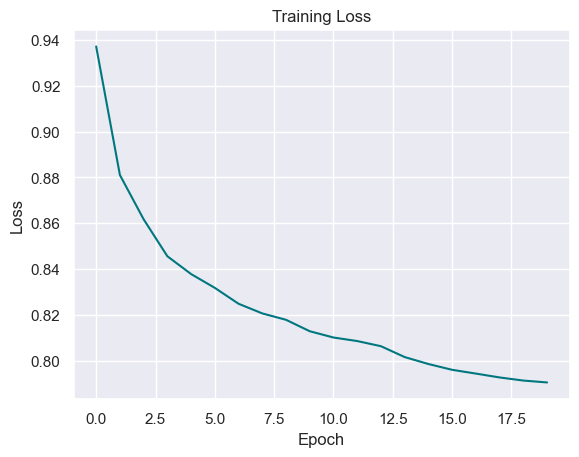

In [17]:
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float32)), batch_size=64, shuffle=True)
losses = []

for epoch in range(20):
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        outputs = model(batch[0])
        loss = criterion(outputs, batch[0])
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Classification Report for Autoencoder
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85307
           1       0.03      0.91      0.06       136

    accuracy                           0.95     85443
   macro avg       0.51      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



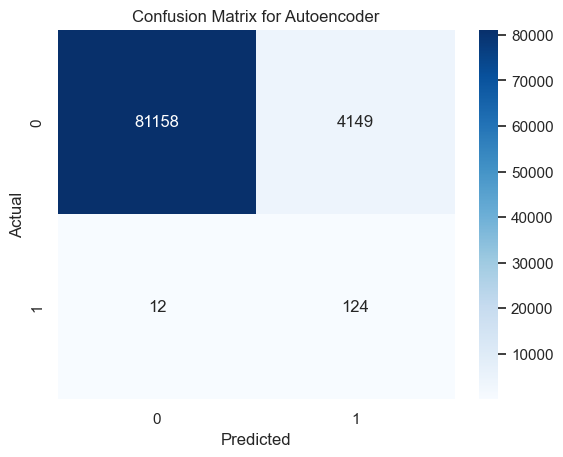

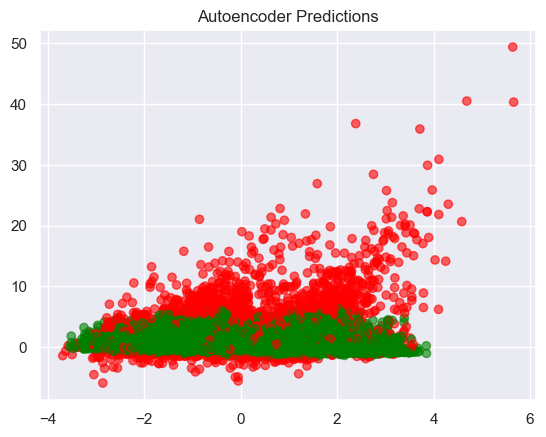

In [18]:
with torch.no_grad():
    reconstructions = model(torch.tensor(X_test, dtype=torch.float32))
    errors = ((reconstructions - torch.tensor(X_test, dtype=torch.float32)) ** 2).mean(dim=1).numpy()

threshold = np.percentile(errors, 95)
autoencoder_preds = (errors > threshold).astype(int)
report(y_test, autoencoder_preds, "Autoencoder")

**Conclusion**

Anomaly detection was performed using Isolation Forest, One-Class SVM, Local Outlier Factor, and an autoencoder. Effectiveness was evaluated with a Confusion Matrix and Classification Report.

  Local Outlier Factor showed the worst performance (recall 0.17), identifying few anomalies due to its local density-based approach, which is ineffective for unevenly distributed data.

  One-Class SVM and autoencoder achieved the highest recall for anomalies (0.90), demonstrating their efficiency in detecting fraudulent transactions.

  Precision for anomalies remained low across all methods due to the significant data imbalance.
  The best methods were One-Class SVM and autoencoder, as they effectively model normal data and detect anomalies as deviations.